# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

The overall project's objective is to *analyze the clients' behavior to know **which plan brings in more revenue** so there can be a calculated adjustment to the advertising budget.*

My initial plan is to load all libraries I think I need and all of the dataframes based on the clients' track records. Following the intilization phase, I will explore the raw data and gain a further understanding on what it has to offer. After refining the data, I can then frequently build, and test hypotheses based on studying the plans' conditions and the cilents' behavior to finally curate an answer on which plan is more lucrative. Lastly, at the end, I will briefly construct an overall conclusion to show the commerical department where they can adjust the advertising budget according to my findings.

I initialized and loaded all the libraries into the project here.

In [1]:
# Loading all the libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st

## Load data

Likewise here, and loaded all the dataframes into the project here.

In [2]:
# Load the data files into different DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
msgs = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

I printed a sample and the general info about the plans' dataframe and have verified that all of the data is accurate, and no need to make any adjustments.

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

I noticed there was nothing to fix here.

I noticed there was nothing to fix here, as well.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [5]:
plans.duplicated().sum()

0

## Users

Right off the bat, I could tell after printing the info and sample methods, the churn date column had (466) NaN values.

In [6]:
# Print the general/summary information about the users' DataFrame

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users

users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
173,1173,Tristan,Cain,27,"Oxnard-Thousand Oaks-Ventura, CA MSA",2018-09-28,surf,NaN
111,1111,Booker,Hahn,75,"Urban Honolulu, HI MSA",2018-09-17,surf,NaN
480,1480,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,surf,NaN
49,1049,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,NaN
267,1267,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,surf,NaN
141,1141,Kirstie,Hodges,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN
189,1189,Terrence,Smith,75,"Columbus, OH MSA",2018-09-24,surf,NaN
396,1396,Ardelia,Benton,65,"Salt Lake City, UT MSA",2018-06-01,surf,NaN
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaN
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

Here, I replaced the NaN values with the numerical value 0 while retaining the other termination dates as most customers didn't leave while obtaining the presented dataset.

In [8]:
users['churn_date'] = users['churn_date'].fillna(0)

users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
272,1272,Ernest,Mercado,23,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-04,surf,0
287,1287,Heide,Gill,74,"Sacramento–Roseville–Folsom, CA MSA",2018-03-15,surf,0
61,1061,Maryam,Valencia,38,"Columbia, SC MSA",2018-03-08,ultimate,0
338,1338,Janise,Bowman,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-09,surf,0
308,1308,Samara,Monroe,46,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-22,surf,0
387,1387,Raymonde,Lowe,28,"Bridgeport-Stamford-Norwalk, CT MSA",2018-05-25,surf,0
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,0
427,1427,Zofia,Brock,64,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-01-26,ultimate,0
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,0
303,1303,Rosamaria,Reeves,67,"Detroit-Warren-Dearborn, MI MSA",2018-10-25,ultimate,0


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

This is noticable when seeing the difference between the initial and final print of the users' info in the churn date column; and thus, no more missing values (and no duplicate values) here!

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users.duplicated().sum()

0

## Calls

After printing the call info and observing the data's sample, I noticed the duration column needed some measurement adjustments as the company, Megaline, made it know that they round their seconds up to minutes.

In [11]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Print a sample of data for calls

calls.sample(10)

,id,user_id,call_date,duration
21034,1077_1001,1077,2018-04-19,11.49
130636,1470_85,1470,2018-07-11,12.40
121361,1427_29,1427,2018-08-23,9.48
110572,1390_21,1390,2018-06-08,2.21
46740,1170_421,1170,2018-10-09,16.17
27556,1105_107,1105,2018-12-31,0.00
124492,1440_8,1440,2018-12-30,0.00
91084,1328_714,1328,2018-11-16,6.59
56421,1202_276,1202,2018-10-08,9.73
66529,1240_387,1240,2018-12-01,17.59


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In order to fix the data, creating a function will allow me to efficiently round up the data to the nearest minute.

In [13]:
def mins_rounded(minutes):
    return mt.ceil(minutes)

calls['mins_rounded'] = calls['duration'].apply(mins_rounded)

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

Therefore, I enriched the data by creating a new column (and a query, to search for random, singular samples) to reflect the rounded data and also retain the original data for comparison purposes.

In [14]:
calls.sample(20)

,id,user_id,call_date,duration,mins_rounded
59993,1215_378,1215,2018-12-07,5.83,6
15253,1061_195,1061,2018-10-14,13.56,14
98056,1352_324,1352,2018-12-01,0.00,0
88148,1324_194,1324,2018-11-19,9.23,10
130081,1467_317,1467,2018-08-24,0.75,1
17188,1066_295,1066,2018-09-30,9.74,10
49087,1177_48,1177,2018-12-11,13.04,14
80748,1291_348,1291,2018-08-03,8.36,9
112387,1396_98,1396,2018-10-24,0.00,0
31886,1120_264,1120,2018-04-19,5.29,6


In [15]:
calls.query('user_id == 1499')[['duration', 'mins_rounded']].sum()

duration        1450.31
mins_rounded    1535.00
dtype: float64

In [16]:
calls.duplicated().sum()

0

## Messages

Here in the Messages section, I printed the info to check the dataframe over all and also checked to see if there was any duplicates any where.

In [17]:
# Print the general/summary information about the messages' DataFrame

msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


I also printed a sample of the data and created a query to make sure I wasn't letting any issues go under the radar and decided to sort the dataframe by Users and get a general idea of each user's message usage is like.

In [18]:
# Print a sample of data for messages

msgs.sample(20)

,id,user_id,message_date
39163,1255_193,1255,2018-11-21
63970,1408_95,1408,2018-05-21
56463,1357_45,1357,2018-08-11
48887,1326_424,1326,2018-10-29
1779,1017_131,1017,2018-10-12
10669,1076_1528,1076,2018-09-30
30214,1189_113,1189,2018-09-25
28316,1174_106,1174,2018-12-04
174,1001_340,1001,2018-10-14
55436,1348_276,1348,2018-12-05


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

Here's the data sorted by users and their sum quantity of messages and the message's IDs

In [19]:
msgs.groupby(['user_id'])[['id', 'message_date']].count().reset_index()

,user_id,id,message_date
0,1000,11,11
1,1001,207,207
2,1002,88,88
3,1003,50,50
4,1004,177,177
...,...,...,...
397,1491,409,409
398,1492,108,108
399,1494,174,174
400,1496,65,65


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

I also double checked to see if there were any duplicates in order for the data further

In [20]:
msgs.duplicated().sum()

0

## Internet

Like with the call section's preprocessing, I made some observations with the general info and sample data

In [21]:
# Print the general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Print a sample of data for the internet traffic

internet.sample(10)

,id,user_id,session_date,mb_used
100041,1474_229,1474,2018-12-22,0.00
72174,1336_201,1336,2018-08-10,498.10
33540,1152_173,1152,2018-11-12,20.54
100792,1477_107,1477,2018-12-27,524.42
102231,1490_46,1490,2018-07-31,667.05
73423,1346_2,1346,2018-11-05,585.30
98858,1466_339,1466,2018-07-22,0.00
67552,1313_226,1313,2018-10-09,129.55
72416,1336_484,1336,2018-08-23,0.00
52165,1236_5,1236,2018-10-19,586.36


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

Therefore made some conversion adjustments (and added a query search) to the data by rounding the original data into a new column in the same dataframe and kept the inital column for comparison purposes.

In [23]:
def mb_to_gb(mb):
    gb = mb/1024
    return mt.ceil(gb)

def convertedValuesAppend(internet, mb_used, mbRoundToGB):
    internet['GB_Rounded'] = internet['mb_used'].apply(mb_to_gb)

convertedValuesAppend(internet, 'mb_used', 'GB_Rounded')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

After my quick conversion, I reflected the data in a vertical table made with a groupby (and attached the query right below).

In [24]:
internet.groupby(['user_id', 'mb_used'])[['GB_Rounded']].sum()

GB_Rounded
user_id mb_used            
1000    0.00              0
        89.86             1
        270.99            1
        660.40            1
        880.22            1
...                     ...
1499    977.02            1
        1039.08           2
        1085.26           2
        1232.86           2
        1444.97           2

[91396 rows x 1 columns]

In [25]:
internet.duplicated().sum()

0

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

After I cleaned the data, I realized I was missing the plan's dataframe and printed it out here since this dataframe has the actual plan conditions and will be useful to append later according to each user.

In [26]:
# Print out the plan conditions and make sure they are clear for you

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

This step is quite complex in terms of tables. But simply put, I calculated and aggergrated all of the tables respectively while I modified their month's columns and said service in a month by sum.

In [27]:
# Calculate the number of calls made by each user per month. Save the result.

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.to_period('m')
monthly_calls = calls.groupby(['user_id','month']).size().reset_index(name='monthly_calls')

#user call consumption -- is used to agg later
u_call_c = monthly_calls.groupby(['user_id','month'])[['monthly_calls']].sum()

u_call_c

monthly_calls
user_id month                 
1000    2018-12             16
1001    2018-08             27
        2018-09             49
        2018-10             65
        2018-11             64
...                        ...
1498    2018-12             39
1499    2018-09             41
        2018-10             53
        2018-11             45
        2018-12             65

[2258 rows x 1 columns]

In [28]:
# Calculate the amount of minutes spent by each user per month. Save the result.

#user minutes consumption -- is used to agg later
u_min_c = calls.groupby(['user_id','month'])['mins_rounded'].sum()

u_min_c

user_id  month  
1000     2018-12    124
1001     2018-08    182
         2018-09    315
         2018-10    393
         2018-11    426
                   ... 
1498     2018-12    339
1499     2018-09    346
         2018-10    385
         2018-11    308
         2018-12    496
Name: mins_rounded, Length: 2258, dtype: int64

In [29]:
# Calculate the number of messages sent by each user per month. Save the result.

msgs['message_date'] = pd.to_datetime(msgs['message_date'])
msgs['month'] = msgs['message_date'].dt.to_period('m')
monthly_msgs = msgs.groupby(['user_id','month']).size().reset_index(name='monthly_msgs')

#user message consumption -- is used to agg later
u_msg_c = monthly_msgs.groupby(['user_id','month'])[['monthly_msgs']].sum()

u_msg_c

monthly_msgs
user_id month                
1000    2018-12            11
1001    2018-08            30
        2018-09            44
        2018-10            53
        2018-11            36
...                       ...
1496    2018-09            21
        2018-10            18
        2018-11            13
        2018-12            11
1497    2018-12            50

[1806 rows x 1 columns]

In [30]:
# Calculate the volume of internet traffic used by each user per month. Save the result.


internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.to_period('m')
internet_traffic = internet.groupby(['user_id','month']).size().reset_index(name='monthly_traffic')

#user web consumption -- is used to agg later
u_web_c = internet_traffic.groupby(['user_id', 'month'])[['monthly_traffic']].sum()

u_web_c

monthly_traffic
user_id month                   
1000    2018-12                5
1001    2018-08               25
        2018-09               53
        2018-10               56
        2018-11               51
...                          ...
1498    2018-12               65
1499    2018-09               45
        2018-10               61
        2018-11               49
        2018-12               65

[2277 rows x 1 columns]

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

Next, I merged the individual tables into a larger table to collectively see them all together with the plan table - since I needed each cilent's data to be associated with what plan they were under.

In [31]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

user_data = pd.concat([u_min_c, u_call_c], axis='columns')
user_data_2 = pd.concat([user_data, u_web_c], axis='columns')
user_data_3 = pd.concat([user_data_2, u_msg_c], axis='columns').fillna(0)

user_data_3

mins_rounded  monthly_calls  monthly_traffic  monthly_msgs
user_id month                                                              
1000    2018-12         124.0           16.0              5.0          11.0
1001    2018-08         182.0           27.0             25.0          30.0
        2018-09         315.0           49.0             53.0          44.0
        2018-10         393.0           65.0             56.0          53.0
        2018-11         426.0           64.0             51.0          36.0
...                       ...            ...              ...           ...
1498    2018-12         339.0           39.0             65.0           0.0
1499    2018-09         346.0           41.0             45.0           0.0
        2018-10         385.0           53.0             61.0           0.0
        2018-11         308.0           45.0             49.0           0.0
        2018-12         496.0           65.0             65.0           0.0

[2293 rows x 4 columns]

In [32]:
new_df = pd.merge(user_data_3, users, left_on='user_id', right_on='user_id', how='left')
new_df.sample(13)

,user_id,mins_rounded,monthly_calls,monthly_traffic,monthly_msgs,first_name,last_name,age,city,reg_date,plan,churn_date
945,1196,565.0,80.0,38.0,28.0,Noel,Dawson,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,0
1507,1328,903.0,132.0,62.0,164.0,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,0
1038,1216,372.0,49.0,43.0,0.0,Reita,Atkins,29,"San Francisco-Oakland-Berkeley, CA MSA",2018-06-19,surf,0
2130,1462,445.0,61.0,43.0,87.0,Lesley,Workman,20,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-05,ultimate,0
1283,1270,512.0,69.0,58.0,22.0,Anjelica,Chan,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-18,ultimate,0
1431,1312,534.0,61.0,76.0,38.0,Kory,Emerson,42,"Fresno, CA MSA",2018-01-26,surf,0
1751,1377,454.0,62.0,74.0,0.0,Vallie,Conway,18,"Rochester, NY MSA",2018-03-27,surf,0
467,1099,444.0,74.0,50.0,29.0,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-26,surf,0
1445,1315,350.0,43.0,15.0,35.0,Mora,Schroeder,45,"Raleigh-Cary, NC MSA",2018-04-26,surf,2018-10-03
145,1040,294.0,43.0,38.0,0.0,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30


In [33]:
# Add the plan information
mass_user_data = pd.merge(new_df, plans, left_on='plan', right_on='plan_name', how='left')
mass_user_data = mass_user_data.drop(['plan'], axis=1)
mass_user_data

,user_id,mins_rounded,monthly_calls,monthly_traffic,monthly_msgs,first_name,last_name,age,city,reg_date,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,124.0,16.0,5.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,182.0,27.0,25.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
2,1001,315.0,49.0,53.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
3,1001,393.0,65.0,56.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
4,1001,426.0,64.0,51.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,339.0,39.0,65.0,0.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,0,50,15360,500,20,10,0.03,0.03,surf
2289,1499,346.0,41.0,45.0,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,0,50,15360,500,20,10,0.03,0.03,surf
2290,1499,385.0,53.0,61.0,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,0,50,15360,500,20,10,0.03,0.03,surf
2291,1499,308.0,45.0,49.0,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,0,50,15360,500,20,10,0.03,0.03,surf


Out of curiousity, I also separated the users by their respective plans. Therefore then, I separated the massive table by both plans to calculate definitively how much revenue was curated by the users from both plans and reflect that data by each user, each month, in to a new column called the total revenue -- all stored in the each plan's dataframe.

In [34]:
surf_df = mass_user_data[mass_user_data['plan_name'] == 'surf']
surf_df

,user_id,mins_rounded,monthly_calls,monthly_traffic,monthly_msgs,first_name,last_name,age,city,reg_date,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1001,182.0,27.0,25.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
2,1001,315.0,49.0,53.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
3,1001,393.0,65.0,56.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
4,1001,426.0,64.0,51.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
5,1001,412.0,56.0,60.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,339.0,39.0,65.0,0.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,0,50,15360,500,20,10,0.03,0.03,surf
2289,1499,346.0,41.0,45.0,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,0,50,15360,500,20,10,0.03,0.03,surf
2290,1499,385.0,53.0,61.0,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,0,50,15360,500,20,10,0.03,0.03,surf
2291,1499,308.0,45.0,49.0,0.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,0,50,15360,500,20,10,0.03,0.03,surf


In [35]:
ultimate_df = mass_user_data[mass_user_data['plan_name'] == 'ultimate']
ultimate_df

,user_id,mins_rounded,monthly_calls,monthly_traffic,monthly_msgs,first_name,last_name,age,city,reg_date,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,124.0,16.0,5.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,0,1000,30720,3000,70,7,0.01,0.01,ultimate
19,1006,10.0,2.0,7.0,15.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
20,1006,59.0,9.0,63.0,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
26,1008,476.0,71.0,57.0,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,0,1000,30720,3000,70,7,0.01,0.01,ultimate
27,1008,446.0,63.0,72.0,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,0,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,1493,529.0,66.0,47.0,0.0,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,0,1000,30720,3000,70,7,0.01,0.01,ultimate
2259,1493,450.0,66.0,53.0,0.0,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,0,1000,30720,3000,70,7,0.01,0.01,ultimate
2260,1493,500.0,73.0,51.0,0.0,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,0,1000,30720,3000,70,7,0.01,0.01,ultimate
2261,1493,473.0,65.0,46.0,0.0,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,0,1000,30720,3000,70,7,0.01,0.01,ultimate


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

This is a closer look into how I calculated the monthly revenue for each user by plans and then merged them again

In [36]:
# Calculate the monthly revenue for each user by plans and then merged them again.
#Surf's Plan User Data


#Removing unwanted columns
small_s = surf_df.drop(['first_name','last_name','age','city','reg_date','churn_date'], axis=1)


#service plan (exceeding) fees
s_gb_fees = 10
s_ct_fees = 0.03
s_monthly_charge = 20

#service calculations by columns
small_s['call_revenue'] = small_s['mins_rounded'].apply(lambda x: (x-500)*s_ct_fees if x>500 else 0)
small_s['msgs_revenue'] = small_s['monthly_msgs'].apply(lambda x: (x-50)*s_ct_fees if x>50 else 0)
small_s['internet_revenue'] = small_s['monthly_traffic'].apply(lambda x: (x-15)*s_gb_fees if x>15 else 0)


#total revenue & monthly fee calculations
small_s['total_revenue'] = s_monthly_charge + small_s['call_revenue'] + small_s['msgs_revenue'] + small_s['internet_revenue']
small_s

,user_id,mins_rounded,monthly_calls,monthly_traffic,monthly_msgs,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,call_revenue,msgs_revenue,internet_revenue,total_revenue
1,1001,182.0,27.0,25.0,30.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,100.0,120.00
2,1001,315.0,49.0,53.0,44.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,380.0,400.00
3,1001,393.0,65.0,56.0,53.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.09,410.0,430.09
4,1001,426.0,64.0,51.0,36.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,360.0,380.00
5,1001,412.0,56.0,60.0,44.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,450.0,470.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,339.0,39.0,65.0,0.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,500.0,520.00
2289,1499,346.0,41.0,45.0,0.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,300.0,320.00
2290,1499,385.0,53.0,61.0,0.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,460.0,480.00
2291,1499,308.0,45.0,49.0,0.0,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,340.0,360.00


In [37]:
# Ultimate's Plan User Data

#Removing unwanted columns
small_u = ultimate_df.drop(['first_name','last_name','age','city','reg_date','churn_date' ], axis=1)


#service plan (exceeding) fees
u_gb_fees = 7
u_ct_fees = 0.01
u_monthly_charge = 70

#service calculations by columns
small_u['call_revenue'] = small_u['mins_rounded'].apply(lambda x: (x-3000)*s_ct_fees if x>3000 else 0)
small_u['msgs_revenue'] = small_u['monthly_msgs'].apply(lambda x: (x-1000)*s_ct_fees if x>1000 else 0)
small_u['internet_revenue'] = small_u['monthly_traffic'].apply(lambda x: (x-30)*s_gb_fees if x>30 else 0)


#total revenue & monthly fee calculations
small_u['total_revenue'] = u_monthly_charge + small_u['call_revenue'] + small_u['msgs_revenue'] + small_u['internet_revenue']
small_u

,user_id,mins_rounded,monthly_calls,monthly_traffic,monthly_msgs,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,call_revenue,msgs_revenue,internet_revenue,total_revenue
0,1000,124.0,16.0,5.0,11.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,0.0,70.0
19,1006,10.0,2.0,7.0,15.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,0.0,70.0
20,1006,59.0,9.0,63.0,139.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,330.0,400.0
26,1008,476.0,71.0,57.0,21.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,270.0,340.0
27,1008,446.0,63.0,72.0,37.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,420.0,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,1493,529.0,66.0,47.0,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,170.0,240.0
2259,1493,450.0,66.0,53.0,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,230.0,300.0
2260,1493,500.0,73.0,51.0,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,210.0,280.0
2261,1493,473.0,65.0,46.0,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0,0,160.0,230.0


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

Given my prior step had left off with the two plans in their own separate dataframes, I decided to combine them both so it would be easier to compare averages of total revenue by months under each plan and for each service capable of interpreting: 
    
    1. A pivot table displaying the users' data by month
    2. Reflect this pivot table visually with a bar chart and box plot (and a histogram visual for the data on calls)
    3. Calculations on the mean and variance to point out potential differences between the plans  

__For the Calls' section__    

In terms of their bar graph comparisons, both plans tend to show more similarities than differences, although, ultimate's data seems to reach a tad bit beyond Surf's data; however, in the histogram, surf seems to be towering over ultimate's data. 

### Calls

In [38]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

u_call_data = small_u.merge(calls, on='user_id')
u_call_data

s_call_data = small_s.merge(calls, on='user_id')
s_call_data


#the merge of the two DFs above - PCA - Plans Call Data
pca = pd.concat([u_call_data, s_call_data], axis='rows')
pca

#PCA's Pivot Chart of the average duration of calls in a month by plan

avg_calls_pivot = pca.pivot_table(index='plan_name', columns='month', values='mins_rounded_x', aggfunc='mean')
avg_calls_pivot

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan_name,,,,,,,,,,,,
surf,551.950000,463.877189,474.442364,535.845709,529.515771,522.082418,535.813178,526.297221,516.519336,511.565118,510.120133,513.392030
ultimate,588.482887,562.088811,508.166610,488.285471,494.475319,511.207246,530.043533,524.028672,532.414016,528.672032,524.698672,523.780302


In [39]:
df_reset = avg_calls_pivot.reset_index()
df_reset = df_reset.rename(columns={'index': 'plan'})

melted_df = pd.melt(df_reset, id_vars=['plan_name'], var_name='month', value_name='values')

# Displaying the pivot table's data above but vertically
melted_df

,plan_name,month,values
0,surf,2018-01,551.950000
1,ultimate,2018-01,588.482887
2,surf,2018-02,463.877189
3,ultimate,2018-02,562.088811
4,surf,2018-03,474.442364
5,ultimate,2018-03,508.166610
6,surf,2018-04,535.845709
7,ultimate,2018-04,488.285471
8,surf,2018-05,529.515771
9,ultimate,2018-05,494.475319


<Figure size 1440x216 with 0 Axes>

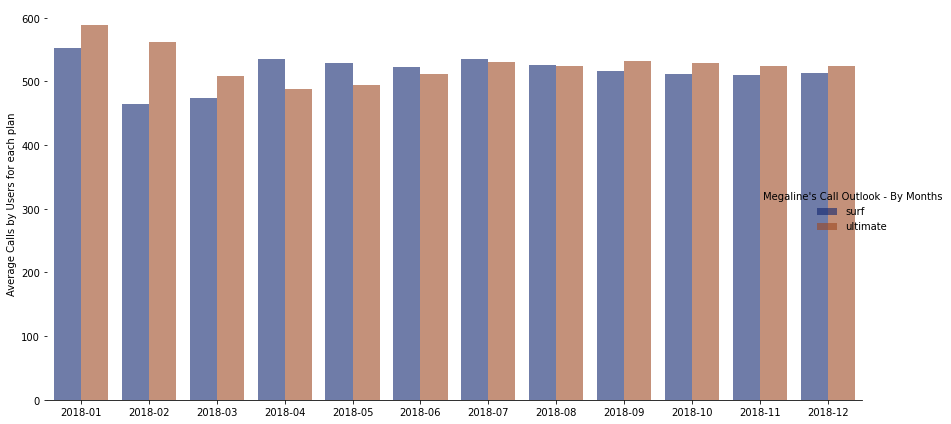

In [40]:
plt.figure(figsize=(20, 3))
bar = sns.catplot(
    data=melted_df,
    kind="bar",
    x="month",
    y="values",
    hue="plan_name",
    palette="dark",
    alpha=.6, height=6, aspect=2
)
bar.despine(left=True)
bar.set_axis_labels("", "Average Calls by Users for each plan")
bar.legend.set_title("Megaline's Call Outlook - By Months")
plt.show()

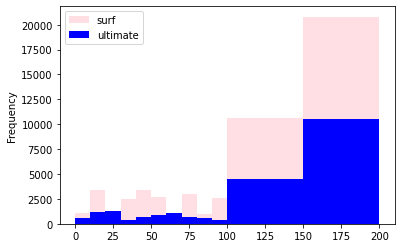

In [41]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

hist_bin = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]

pca[pca['plan_name']=='surf']['mins_rounded_x'].plot(kind='hist', bins=hist_bin, alpha=0.5, color='pink')
pca[pca['plan_name']=='ultimate']['mins_rounded_x'].plot(kind='hist', bins=hist_bin, color='blue')


plt.legend(['surf', 'ultimate'])
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

__For the Calls' section__ 

    
Meanwhile with their variance & mean and box plot comparisons, there seems to be some similarities once again (i.e. both plans average's for their box plot median ranges from 300-600, yet surf's range is smaller than ultimate's), nothing too special for the calls asepect, I suppose.

In [42]:
# Calculate the mean and the variance of the monthly call duration

u_m_call = pca[pca['plan_name']=='ultimate']['mins_rounded_x'].mean()
u_v_call = np.var(pca[pca['plan_name']=='ultimate']['mins_rounded_x'])

print(f'The Ultimate plan\'s call mean: {u_m_call:.2f} and its call variance: {u_v_call:.2f}.')


s_m_call = pca[pca['plan_name']=='surf']['mins_rounded_x'].mean()
s_v_call = np.var(pca[pca['plan_name']=='surf']['mins_rounded_x'])

print(f'The Surf plan\'s call mean: {s_m_call:.2f} and its call variance: {s_v_call:.2f}.')

The Ultimate plan's call mean: 523.17 and its call variance: 61624.88.
The Surf plan's call mean: 518.29 and its call variance: 56647.21.


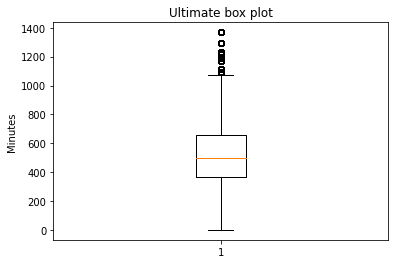

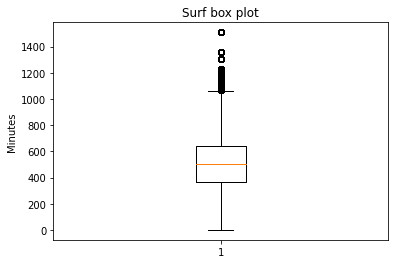

In [43]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Ultimate box plot
plt.boxplot(pca[pca['plan_name']=='ultimate']['mins_rounded_x'])
plt.title('Ultimate box plot')
plt.ylabel('Minutes')
plt.show()

# Surf box plot
plt.boxplot(pca[pca['plan_name']=='surf']['mins_rounded_x'])
plt.title('Surf box plot')
plt.ylabel('Minutes')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

 __For the Messsages' section__    

In terms of their bar graph comparisons, there is more of a widening gap overall -- with the ultimate plan in first. There's also a clear dip between Feburary and April for both plans but the only time the Surf's data outshines ultimate's is in January.

### Messages

<Figure size 1440x216 with 0 Axes>

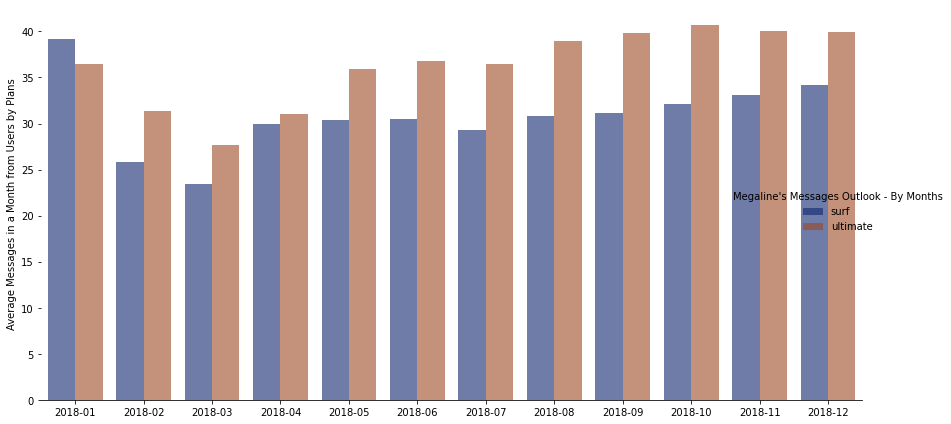

In [44]:
# Compare the number of messages users of each plan tend to send each month

#Converting Table from Horizont. to Vertical
msg_data_pca = pca.loc[:,['plan_name', 'monthly_msgs', 'month']]
avg_msgs_pivot = msg_data_pca.pivot_table(index='plan_name', columns='month', values='monthly_msgs', aggfunc='mean')
avg_msgs_pivot

df_reset = avg_msgs_pivot.reset_index()
df_reset = df_reset.rename(columns={'index': 'plan'})

vertical_msgs_pivot = pd.melt(df_reset, id_vars=['plan_name'], var_name='month', value_name='monthly_msgs')
vertical_msgs_pivot


#Display of Bar Chart
plt.figure(figsize=(20, 3))
bar = sns.catplot(
    data=vertical_msgs_pivot,
    kind="bar",
    x="month",
    y="monthly_msgs",
    hue="plan_name",
    palette="dark",
    alpha=.6, height=6, aspect=2
)
bar.despine(left=True)
bar.set_axis_labels("", "Average Messages in a Month from Users by Plans")
bar.legend.set_title("Megaline's Messages Outlook - By Months")
plt.show()

 __For the Messsages' section__    

In terms of numbers, their variances and means are a pretty close to each other.

In [45]:
# Calculate the mean and the variance of the monthly message duration

#User Messages' variance & mean by plans 

u_m_msgs = pca[pca['plan_name']=='ultimate']['monthly_msgs'].mean()
u_v_msgs = np.var(pca[pca['plan_name']=='ultimate']['monthly_msgs'])

print(f'The Ultimate plan\'s mean: {u_m_msgs:.2f} and its variance: {u_v_msgs:.2f}.')


s_m_msgs = pca[pca['plan_name']=='surf']['monthly_msgs'].mean()
s_v_msgs = np.var(pca[pca['plan_name']=='surf']['monthly_msgs'])

print(f'The Surf plan\'s mean: {s_m_msgs:.2f} and its variance: {s_v_msgs:.2f}.')

The Ultimate plan's mean: 38.42 and its variance: 1257.44.
The Surf plan's mean: 31.55 and its variance: 1226.87.


__For the Messsages' section__    
        
As for the box plots, Ultimate's 4th quartile has fewer outliers compared to Surf's 4th. Though overall within the spread of each plan's box plot most data reside on the lower end (give or take maybe below 60 - 70 messages a month). 

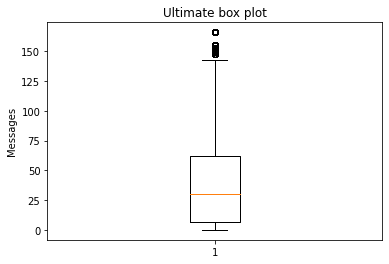

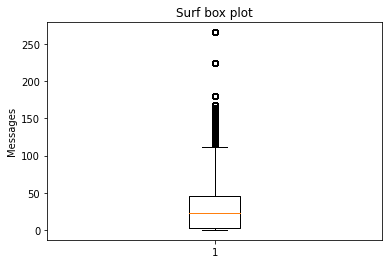

In [46]:
# Plot a boxplot to visualize the distribution of the monthly message duration

# Ultimate box plot
plt.boxplot(pca[pca['plan_name']=='ultimate']['monthly_msgs'])
plt.title('Ultimate box plot')
plt.ylabel('Messages')
plt.show()

# Surf box plot
plt.boxplot(pca[pca['plan_name']=='surf']['monthly_msgs'])
plt.title('Surf box plot')
plt.ylabel('Messages')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

 __For the Internet' section__

In terms of their bar graph comparisons, the first half of the year and the second half has a polarity where the first has the greateset difference in users' GB usage compared to the latter half of the year - for both plans.

### Internet

<Figure size 1440x216 with 0 Axes>

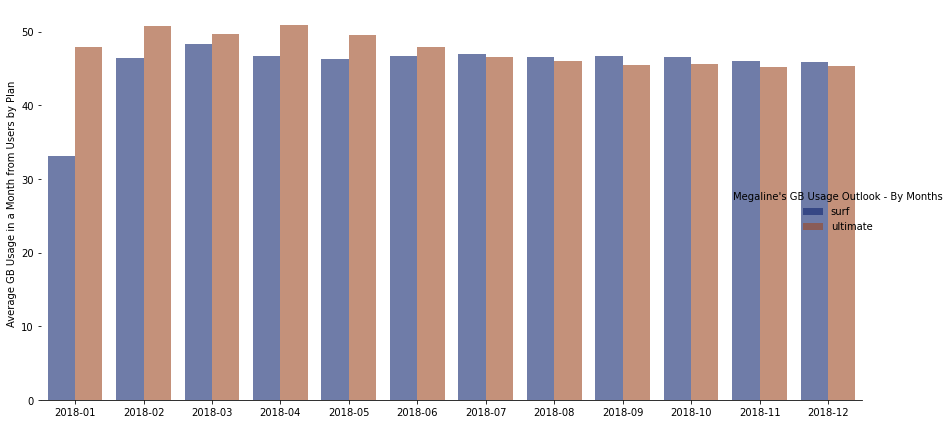

In [47]:
# Compare the amount of internet traffic consumed by users per plan


#Converting Table from Horizont. to Vertical
web_data_pca = pca.loc[:,['plan_name', 'monthly_traffic', 'month']]
avg_web_pivot = web_data_pca.pivot_table(index='plan_name', columns='month', values='monthly_traffic', aggfunc='mean')
avg_web_pivot


df_reset = avg_web_pivot.reset_index()
df_reset = df_reset.rename(columns={'index': 'plan'})


vertical_web_pivot = pd.melt(df_reset, id_vars=['plan_name'], var_name='month', value_name='monthly_traffic')
vertical_web_pivot


#Display of Bar Chart
plt.figure(figsize=(20, 3))
bar = sns.catplot(
    data=vertical_web_pivot,
    kind="bar",
    x="month",
    y="monthly_traffic",
    hue="plan_name",
    palette="dark",
    alpha=.6, height=6, aspect=2
)
bar.despine(left=True)
bar.set_axis_labels("", "Average GB Usage in a Month from Users by Plan")
bar.legend.set_title("Megaline's GB Usage Outlook - By Months")
plt.show()

 __For the Internet' section__    
 
In terms of numbers, this is more evident with the variances and means on how close they are; likewise, with their box plots. 

In [48]:
#Internet Traffic's variance & mean of monthly traffic for both plans

u_m_web = pca[pca['plan_name']=='ultimate']['monthly_traffic'].mean()
u_v_web = np.var(pca[pca['plan_name']=='ultimate']['monthly_traffic'])

print(f'The Ultimate plan\'s traffic mean: {u_m_web:.2f} and its traffic variance: {u_v_web:.2f}.')


s_m_web = pca[pca['plan_name']=='surf']['monthly_traffic'].mean()
s_v_web = np.var(pca[pca['plan_name']=='surf']['monthly_traffic'])

print(f'The Surf plan\'s traffic mean: {s_m_web:.2f} and its traffic variance: {s_v_web:.2f}.')

The Ultimate plan's traffic mean: 46.37 and its traffic variance: 294.64.
The Surf plan's traffic mean: 46.44 and its traffic variance: 339.98.


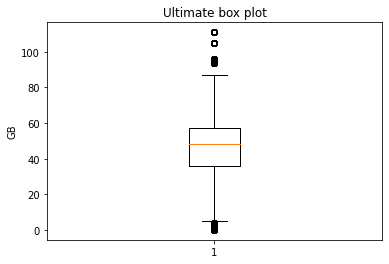

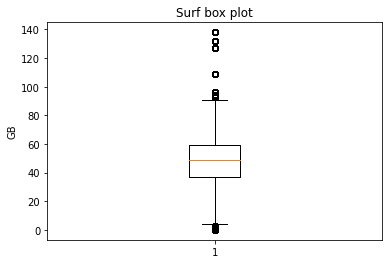

In [49]:
# 2 boxplots to visualize the distribution of the monthly traffic for both plans

# Ultimate box plot
plt.boxplot(pca[pca['plan_name']=='ultimate']['monthly_traffic'])
plt.title('Ultimate box plot')
plt.ylabel('GB')
plt.show()

# Surf box plot
plt.boxplot(pca[pca['plan_name']=='surf']['monthly_traffic'])
plt.title('Surf box plot')
plt.ylabel('GB')
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

__For the Revenue's section__    

In terms of their bar graph comparisons, it's very clear that surf's revenue topples over ultimate's revenue. Moreso, the spread for surf's total revenue seems a bit more lucrative and consistent throughout the year, compared to ultimate's revenue as it has a gradual and quick rise earlier in the year and it steadies for the remainder of the year.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

<Figure size 1440x216 with 0 Axes>

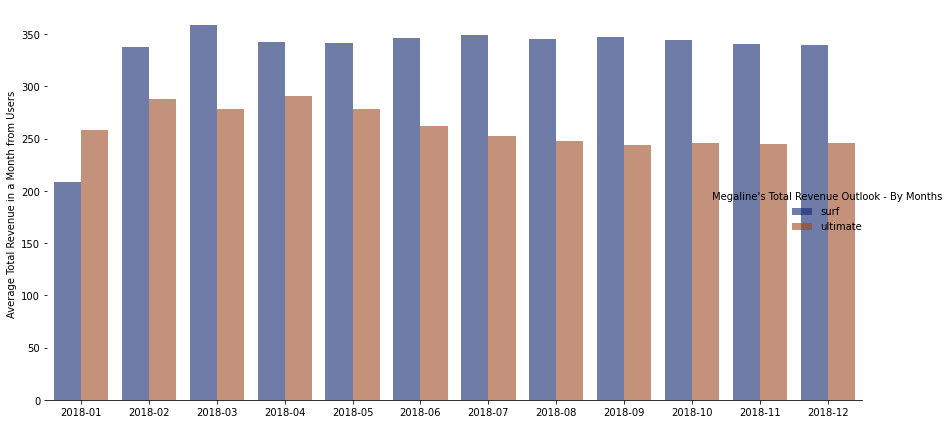

In [50]:
# The amount of total revenue curated by users per plan


#Converting Table from Horizont. to Vertical
total_rev_pca = pca.loc[:,['plan_name', 'total_revenue', 'month']]
avg_rev_pivot = total_rev_pca.pivot_table(index='plan_name', columns='month', values='total_revenue', aggfunc='mean')
avg_rev_pivot


df_reset = avg_rev_pivot.reset_index()
df_reset = df_reset.rename(columns={'index': 'plan'})


total_rev_pivot = pd.melt(df_reset, id_vars=['plan_name'], var_name='month', value_name='total_revenue')
total_rev_pivot


#Display of Bar Chart
plt.figure(figsize=(20, 3))
bar = sns.catplot(
    data=total_rev_pivot,
    kind="bar",
    x="month",
    y="total_revenue",
    hue="plan_name",
    palette="dark",
    alpha=.6, height=6, aspect=2
)
bar.despine(left=True)
bar.set_axis_labels("", "Average Total Revenue in a Month from Users")
bar.legend.set_title("Megaline's Total Revenue Outlook - By Months")
plt.show()

__For the Revenue's section__    

Likewise with the numbers comparison, this clearly shows more as there's a significant wide gap (near a 100) amidst their means.

In [51]:
#Total Revenue's variance & mean based on the monthly revenue curated by both plans

u_m_rev = pca[pca['plan_name']=='ultimate']['total_revenue'].mean() #used in the stat. hypot check
u_v_rev = np.var(pca[pca['plan_name']=='ultimate']['total_revenue'])

print(f'The Ultimate plan\'s Revenue mean: {u_m_rev:.2f} and its Revenue variance: {u_v_rev:.2f}.')


s_m_rev = pca[pca['plan_name']=='surf']['total_revenue'].mean() #used in the stat. hypot check
s_v_rev = np.var(pca[pca['plan_name']=='surf']['total_revenue'])

print(f'The Surf plan\'s Revenue mean: {s_m_rev:.2f} and its Revenue variance: {s_v_rev:.2f}.')

The Ultimate plan's Revenue mean: 252.30 and its Revenue variance: 19788.26.
The Surf plan's Revenue mean: 343.83 and its Revenue variance: 29404.32.


__For the Revenue's section__    

As for the plans' box plots, there's a clear commonality that both plans share: that their date tends to lie for the most part in the 1st and 2nd Quartile or just really centered around the median. Although I also noticed their ranges vary as the surf's plan range is a bit more closer or narrow with more visually appearing outliers versus Ultimate's case as their range is a bit more wider with less visually appearing outliers.

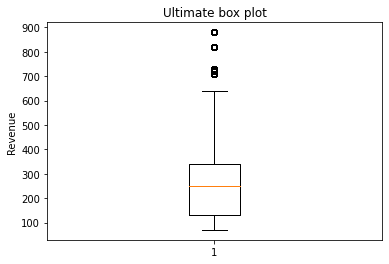

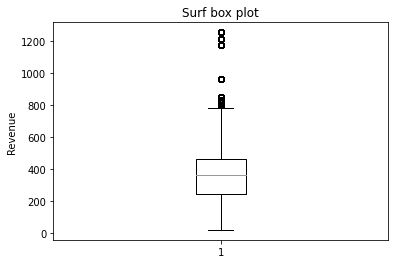

In [52]:
#2 boxplots to visualize the distribution of the total revenue curated by each plan

# Ultimate box plot
plt.boxplot(pca[pca['plan_name']=='ultimate']['total_revenue'])
plt.title('Ultimate box plot')
plt.ylabel('Revenue')
plt.show()

# Surf box plot
plt.boxplot(pca[pca['plan_name']=='surf']['total_revenue'])
plt.title('Surf box plot')
plt.ylabel('Revenue')
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

 __For the Statistical Hypotheses's section__    

Given my observations, I will consider the surf's plan as being more lucrative. I will also consider NY & NJ's area to be also lurcrative when it comes to the statisical analysis following below.

H0: The monthly revenue does not differ between the two groups of users.
H1: The monthly revenue does differ between the two groups of users.

In [53]:
tr_ult = pca[pca['plan_name']=='ultimate']['total_revenue']
tr_surf = pca[pca['plan_name']=='surf']['total_revenue']

alpha = 0.05

# Testing the hypotheses
avg_rev_result = st.ttest_ind(tr_ult, tr_surf, equal_var = False)

print('p-value: ', avg_rev_result.pvalue)

if avg_rev_result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.0
We reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

 __For the Statistical Hypotheses's section__    

I will also consider NY & NJ's area to be also lurcrative when it comes to the statisical analysis following below.

H0: The monthly revenue does differ between the two groups of users, in terms of area.
H1: The monthly revenue does not differ between the two groups of users, in terms of area.

In [54]:
city_revenue = pca.merge(users, left_on='user_id', right_on='user_id')
city_revenue

,user_id,mins_rounded_x,monthly_calls,monthly_traffic,monthly_msgs,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,...,duration,mins_rounded_y,month,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,124.0,16.0,5.0,11.0,1000,30720,3000,70,7,...,8.52,9,2018-12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1000,124.0,16.0,5.0,11.0,1000,30720,3000,70,7,...,13.66,14,2018-12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
2,1000,124.0,16.0,5.0,11.0,1000,30720,3000,70,7,...,14.48,15,2018-12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
3,1000,124.0,16.0,5.0,11.0,1000,30720,3000,70,7,...,5.76,6,2018-12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
4,1000,124.0,16.0,5.0,11.0,1000,30720,3000,70,7,...,4.22,5,2018-12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916764,1499,496.0,65.0,65.0,0.0,50,15360,500,20,10,...,8.72,9,2018-11,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0
916765,1499,496.0,65.0,65.0,0.0,50,15360,500,20,10,...,10.89,11,2018-10,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0
916766,1499,496.0,65.0,65.0,0.0,50,15360,500,20,10,...,8.12,9,2018-09,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0
916767,1499,496.0,65.0,65.0,0.0,50,15360,500,20,10,...,0.37,1,2018-10,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,0


In [55]:
# Calculate the mean and the variance of the two groups: NY-NJ and the Other Areas

#NY - Variance and Mean

m_ny_nj = city_revenue[city_revenue['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue'].mean() #used in the stat. hypot check
v_ny_nj = np.var(city_revenue[city_revenue['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue'])

print(f'New York & New Jersey Areas\' mean: {m_ny_nj:.2f} and their variance: {v_ny_nj:.2f}.')

#Non-NY - Variance and Mean

m_non_ny_nj = city_revenue[city_revenue['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue'].mean() #used in the stat. hypot check
v_non_ny_nj = np.var(city_revenue[city_revenue['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue'])

print(f'Other Areas\' mean: {m_non_ny_nj:.2f} and their variance: {v_non_ny_nj:.2f}.')

New York & New Jersey Areas' mean: 339.56 and their variance: 24560.88.
Other Areas' mean: 310.34 and their variance: 28805.96.


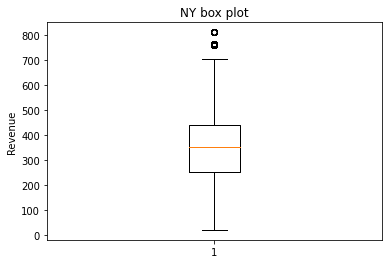

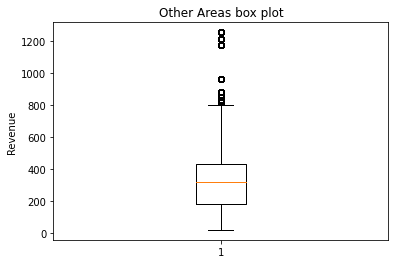

In [56]:
# 2 boxplots to visualize the distribution of the average revenue by the two desired areas

# NY-NJ box plot
plt.boxplot(city_revenue[city_revenue['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue'])
plt.title('NY box plot')
plt.ylabel('Revenue')
plt.show()

# Other Areas box plot
plt.boxplot(city_revenue[city_revenue['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue'])
plt.title('Other Areas box plot')
plt.ylabel('Revenue')
plt.show()

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [57]:
# Test the hypotheses

n_areas = city_revenue[city_revenue['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']

o_areas = city_revenue[city_revenue['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']

alpha = 0.05

areas_rev_result = st.ttest_ind(n_areas, o_areas, equal_var = False)


print('p-value: ', areas_rev_result.pvalue)

if areas_rev_result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.0
We reject the null hypothesis


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

__Overall Conclusion__    

Given my earlier observation, I stated that the surf's plan will be the null hypothesis and can be assumed to be more lucrative (and the ultimate's plan isn't as lucrative and is the alternative hypothesis). However, given my earlier obersations and analyses, both hypothesis results ended in __rejecting the null hypothesis__ and maybe implied two things:
    

That maybe there should be more of a leaning consideration for the ultimate's plan being more lucrative than surf's and oughta gain more advertising budget - despite data visuals showcasing surf's total revenue topple ultimate's and also having a larger user data frame.

As for the area hypothesis, I assumed that maybe due to the smaller sample pool of the New York-Jersey area, the area could be potentially more lucrative as well. However, I'm considering since the NY-NJ size isn't as big as the remaining area pool size, this could've highly influenced the results returning a reject of the null hypothesis but for potentially other underlying reasons that I may have not seen a connection in.